In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df = pd.read_csv(r'C:\Users\Kiruthika\Desktop\heart\heart.csv')

print("Shape: %s" % str(df.shape))
print("Column names: %s" % str(df.columns))

df.head()

Shape: (303, 14)
Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6204A9148>,
      dtype=object)

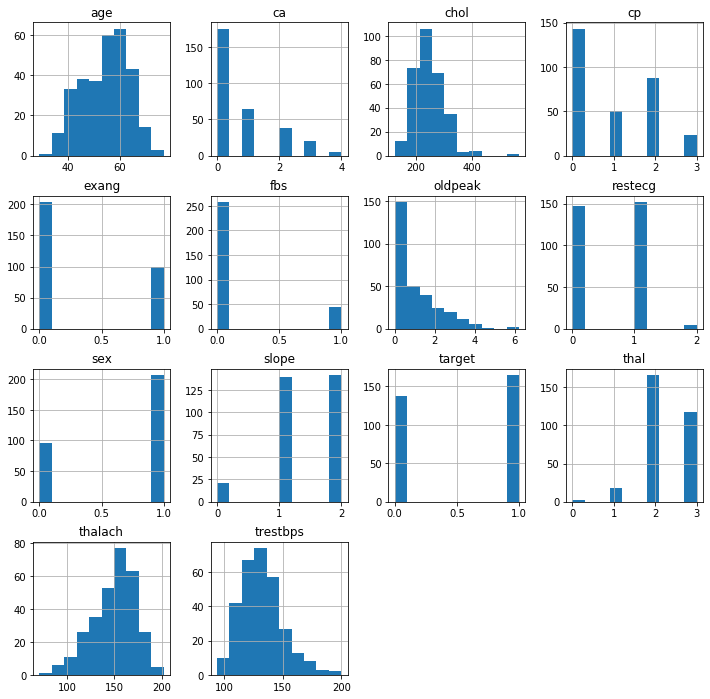

In [7]:
df.hist(figsize=(12,12))

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

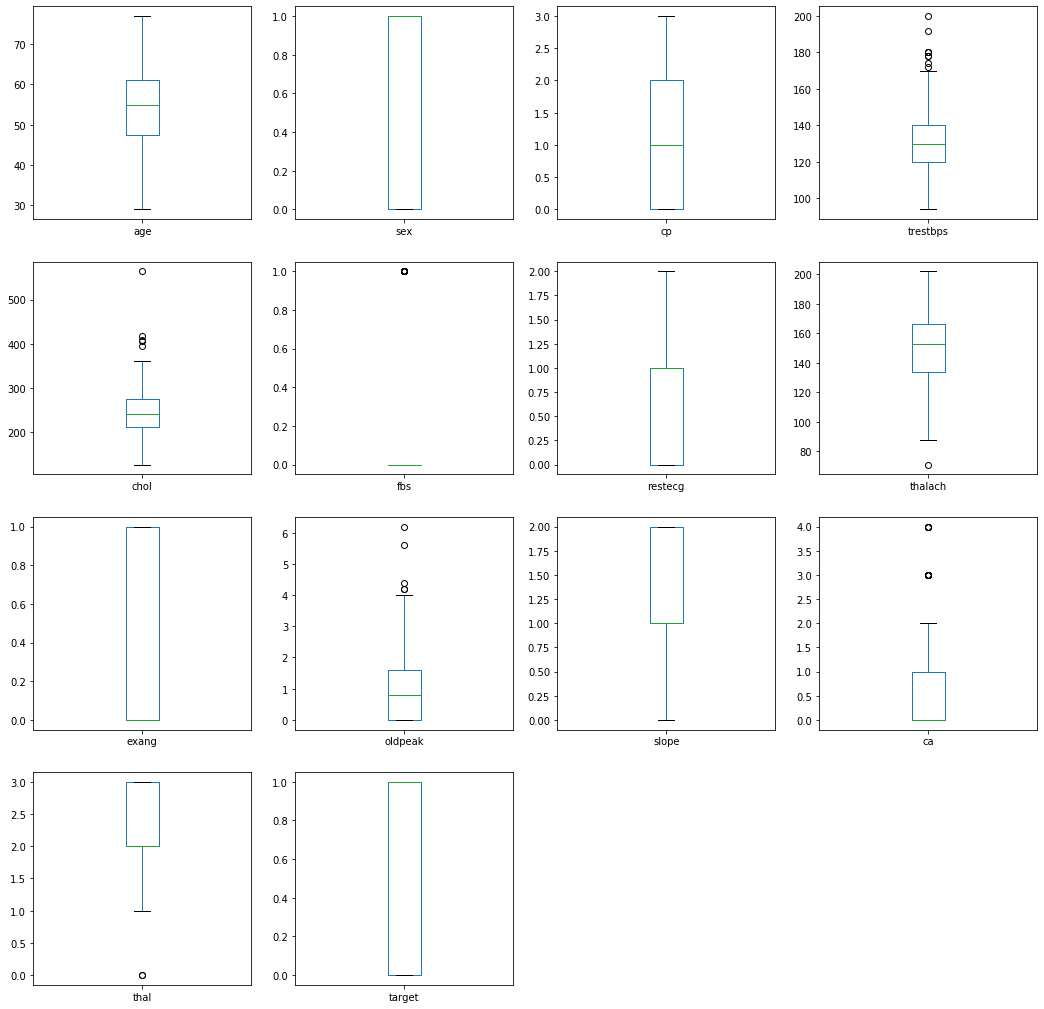

In [9]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(18,18))

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


[Text(0, 0, 'age'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'cp'),
 Text(0, 0, 'trestbps'),
 Text(0, 0, 'chol'),
 Text(0, 0, 'fbs'),
 Text(0, 0, 'restecg'),
 Text(0, 0, 'thalach'),
 Text(0, 0, 'exang'),
 Text(0, 0, 'oldpeak'),
 Text(0, 0, 'slope'),
 Text(0, 0, 'ca'),
 Text(0, 0, 'thal'),
 Text(0, 0, 'target')]

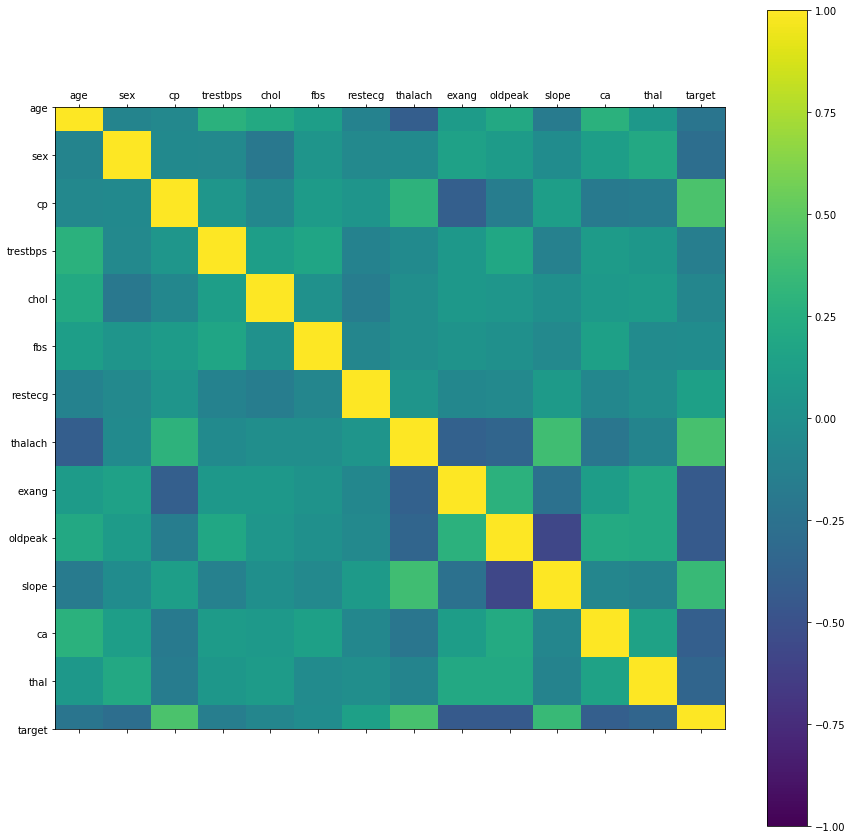

In [11]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

In [12]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [13]:
p_risk = (len(df.loc[(df['target']==1) ])/len(df.loc[df['target']]))*100
print("Percentage of people at risk : ", p_risk)

Percentage of people at risk :  54.45544554455446


In [14]:
abc = pd.crosstab(df['sex'],df['target'])
abc

target,0,1
sex,,
0,24,72
1,114,93


In [15]:
female_risk_percent = (len(df.loc[((df['sex']==0) & df['target']==1) ])/len(df.loc[df['sex']==0]))*100
male_risk_percent = (len(df.loc[((df['sex']==1) & df['target']==1) ])/len(df.loc[df['sex']==1]))*100
print('percentage males at risk : ',male_risk_percent)
print('percentage females at risk : ',female_risk_percent)

percentage males at risk :  44.927536231884055
percentage females at risk :  75.0


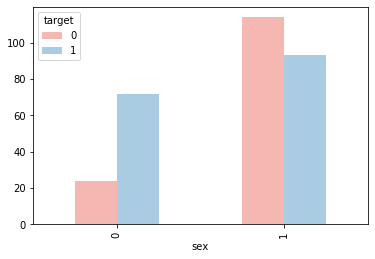

In [16]:
abc.plot(kind='bar', stacked=False, color=['#f5b7b1','#a9cce3'])

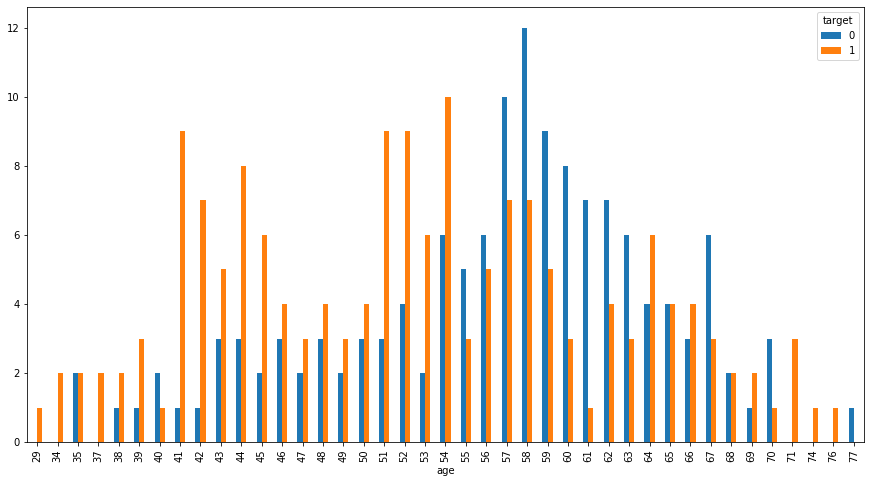

In [17]:
xyz = pd.crosstab(df.age,df.target)
xyz.plot(kind='bar',stacked=False,figsize=(15,8))

In [18]:
pqr = pd.crosstab(df.cp,df.target)
pqr

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


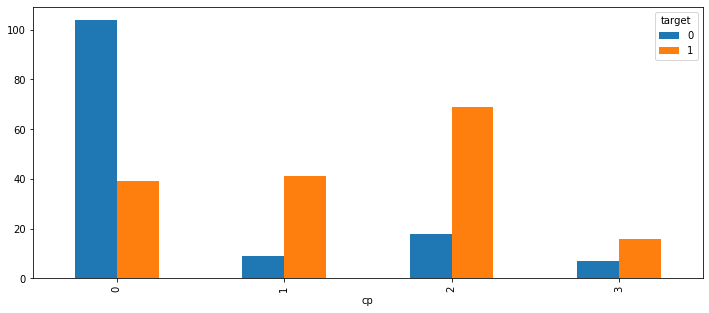

In [19]:
pqr.plot(kind='bar',figsize=(12,5))


In [20]:
mno = pd.crosstab(df.thal,df.target)
mno

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


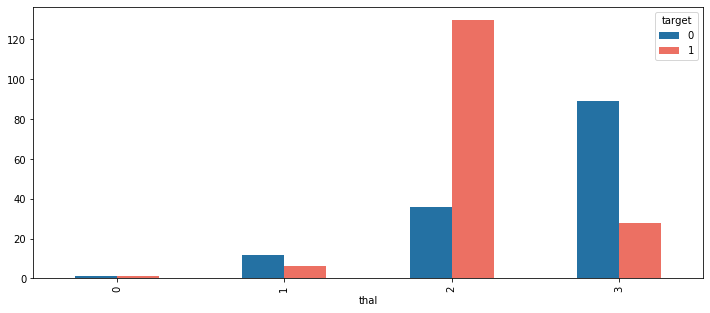

In [21]:
mno.plot(kind='bar', stacked=False, color=['#2471a3','#ec7063'],figsize=(12,5))

In [22]:
array = df.values
X = array[:, 0:13]
y = array[:, 13]

seed = 7
tsize = 0.2

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=seed)

In [24]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scale)
X_test_scale =scale.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scale)

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [26]:
models=[]
models.append(('LR  :', LogisticRegression()))
models.append(('LDA :', LinearDiscriminantAnalysis()))
models.append(('KNN :', KNeighborsClassifier()))
models.append(('CART:', DecisionTreeClassifier()))
models.append(('NB  :', GaussianNB()))
models.append(('SVM :', SVC()))

In [27]:
results = []
names = []
score = 'accuracy'
seed = 7
folds = 10
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.2,random_state=seed)


for name, model in models:
    kfold = KFold(n_splits=folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, scoring=score)
    results.append(cv_results)
    msg ="%s %f (%f)" % (name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)

LR  : 84.295267 (0.634574)
LDA : 84.284979 (2.204445)
KNN : 67.345679 (3.016913)
CART: 79.346708 (2.024228)
NB  : 82.242798 (2.467249)
SVM : 56.198560 (0.505321)


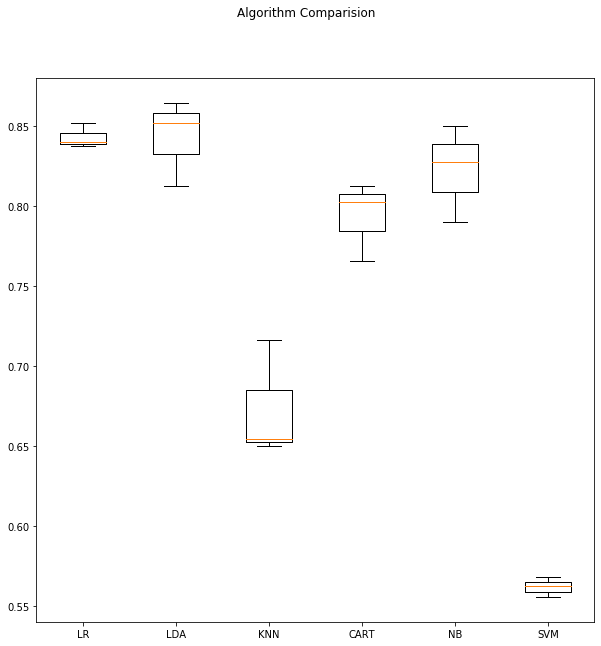

In [28]:
qwerty =['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM'] 

fig = plt.figure(figsize=(10,10))
fig.suptitle("Algorithm Comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(qwerty)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(y_validation, predictions)*100)
print(classification_report(y_validation, predictions))

73.77049180327869
              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69        30
         1.0       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61

